# Chicago Crime Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# imports for supplemental Data
import holidays
import datetime as dt
from holidays import country_holidays

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)

# set random seed
SEED = 321
np.random.seed(SEED)

#display more columns
pd.set_option('display.max_columns',50)

In [2]:
csv = glob.glob('Data/Chicago/*.csv')
dfs = [pd.read_csv(file)for file in csv]
df = pd.concat(dfs,ignore_index=True)
df.head()

ID                    Date         Primary Type  \
0  1318099  01/01/2001 01:00:00 AM              BATTERY   
1  1333483  01/01/2001 01:00:00 PM      CRIMINAL DAMAGE   
2  1311503  01/01/2001 01:00:00 AM  CRIM SEXUAL ASSAULT   
3  1313086  01/01/2001 01:00:00 PM                THEFT   
4  1314713  01/01/2001 01:00:00 PM              ASSAULT   

                      Description     Location Description  Arrest  Domestic  \
0                          SIMPLE  RESIDENCE PORCH/HALLWAY   False      True   
1                      TO VEHICLE                   STREET   False     False   
2   AGGRAVATED: OTHER DANG WEAPON            BAR OR TAVERN   False     False   
3                       OVER $500                    OTHER   False     False   
4  AGGRAVATED:KNIFE/CUTTING INSTR                RESIDENCE    True      True   

   Beat  District  Ward   Latitude  Longitude  
0   214       2.0   NaN  41.819538 -87.620020  
1  2212      22.0   NaN  41.677371 -87.683218  
2  1933      19.0   NaN  41.931374 -87.648819  
3  1732      17.0   NaN  41.953070 -87.716716  
4  1322      12.0   NaN  41.899521 -87.672220

## EDA

- Adding in Holidays to df

In [3]:
all_days = pd.date_range(df["Date"].min(), df["Date"].max())
us_holidays = country_holidays('US')

In [4]:
df["US Holiday"] = [us_holidays.get(day) for day in df['Date']]

- Dropping any columns that will not be used to answer the questions

In [5]:
df=df.drop(columns=['Latitude','Longitude','Ward','Location Description','ID'])

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
df = df.set_index('Date')
df.head()

Primary Type                     Description  \
Date                                                                       
2001-01-01 01:00:00              BATTERY                          SIMPLE   
2001-01-01 13:00:00      CRIMINAL DAMAGE                      TO VEHICLE   
2001-01-01 01:00:00  CRIM SEXUAL ASSAULT   AGGRAVATED: OTHER DANG WEAPON   
2001-01-01 13:00:00                THEFT                       OVER $500   
2001-01-01 13:00:00              ASSAULT  AGGRAVATED:KNIFE/CUTTING INSTR   

                     Arrest  Domestic  Beat  District      US Holiday  
Date                                                                   
2001-01-01 01:00:00   False      True   214       2.0  New Year's Day  
2001-01-01 13:00:00   False     False  2212      22.0  New Year's Day  
2001-01-01 01:00:00   False     False  1933      19.0  New Year's Day  
2001-01-01 13:00:00   False     False  1732      17.0  New Year's Day  
2001-01-01 13:00:00    True      True  1322      12.0  New Year's Day

In [7]:
crime_counts = df['Primary Type'].value_counts().to_frame('# of Crimes')

In [8]:
# Binning for later processing
df['Year']  = df.index.year
df['Month'] = df.index.month
df['HourOfDay'] = df.index.hour 
df.head()

Primary Type                     Description  \
Date                                                                       
2001-01-01 01:00:00              BATTERY                          SIMPLE   
2001-01-01 13:00:00      CRIMINAL DAMAGE                      TO VEHICLE   
2001-01-01 01:00:00  CRIM SEXUAL ASSAULT   AGGRAVATED: OTHER DANG WEAPON   
2001-01-01 13:00:00                THEFT                       OVER $500   
2001-01-01 13:00:00              ASSAULT  AGGRAVATED:KNIFE/CUTTING INSTR   

                     Arrest  Domestic  Beat  District      US Holiday  Year  \
Date                                                                          
2001-01-01 01:00:00   False      True   214       2.0  New Year's Day  2001   
2001-01-01 13:00:00   False     False  2212      22.0  New Year's Day  2001   
2001-01-01 01:00:00   False     False  1933      19.0  New Year's Day  2001   
2001-01-01 13:00:00   False     False  1732      17.0  New Year's Day  2001   
2001-01-01 13:00:00    True      True  1322      12.0  New Year's Day  2001   

                     Month  HourOfDay  
Date                                   
2001-01-01 01:00:00      1          1  
2001-01-01 13:00:00      1         13  
2001-01-01 01:00:00      1          1  
2001-01-01 13:00:00      1         13  
2001-01-01 13:00:00      1         13

## Q1) Which district has the most crimes? Which district has the least?

In [9]:
dist = df.groupby('District')['Primary Type'].value_counts().sort_index()
plot_dist = dist.to_frame('# of crimes').reset_index()

In [10]:
dist = df.groupby('District')['Primary Type'].value_counts().sort_index()
plot_dist = dist.to_frame('# of crimes').reset_index()
combined = plot_dist.groupby('District').agg({'# of crimes':'sum'}).reset_index()

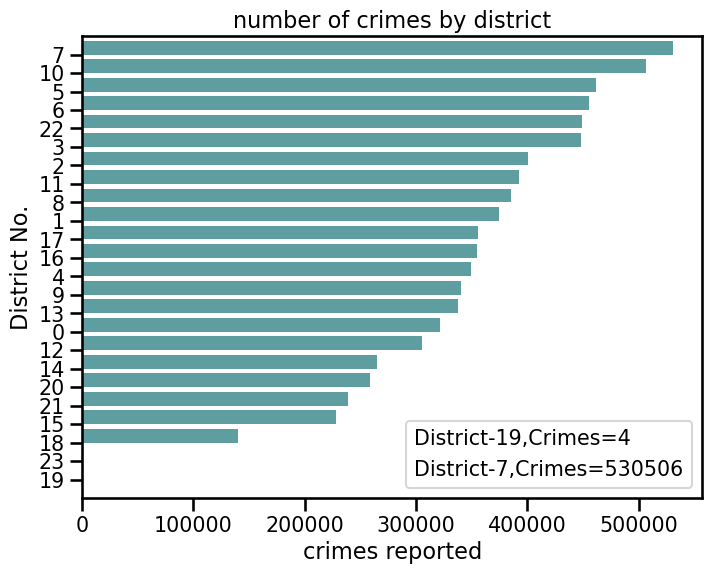

In [11]:
# identify numeric max's for plot legend 
max_id=combined['# of crimes'].idxmax()
max_value=combined['# of crimes'].max()
# identify numeric mins for plot legend
min_id=combined['# of crimes'].idxmin()
min_value=combined['# of crimes'].min()

# set labels f strings for legend
labels=[f'District-{min_id},Crimes={min_value}',f'District-{max_id},Crimes={max_value}']

# plot results
ax=combined.sort_values(by='# of crimes').plot(kind='barh',width=1.5, color='cadetblue' ,figsize=(8,6))
ax.set(title='number of crimes by district', xlabel='crimes reported', ylabel= 'District No.')
ax.legend(labels,handlelength=0, handletextpad=0);

- District 7 has the most amount of crimes with 530,506 reported crimes

- District 19 has the least amount of crimes with 4 reported crimes

## Q2) What months have the most crime? What months have the least crime? Are there any individual crimes that do not follow this pattern? If so, which crimes?

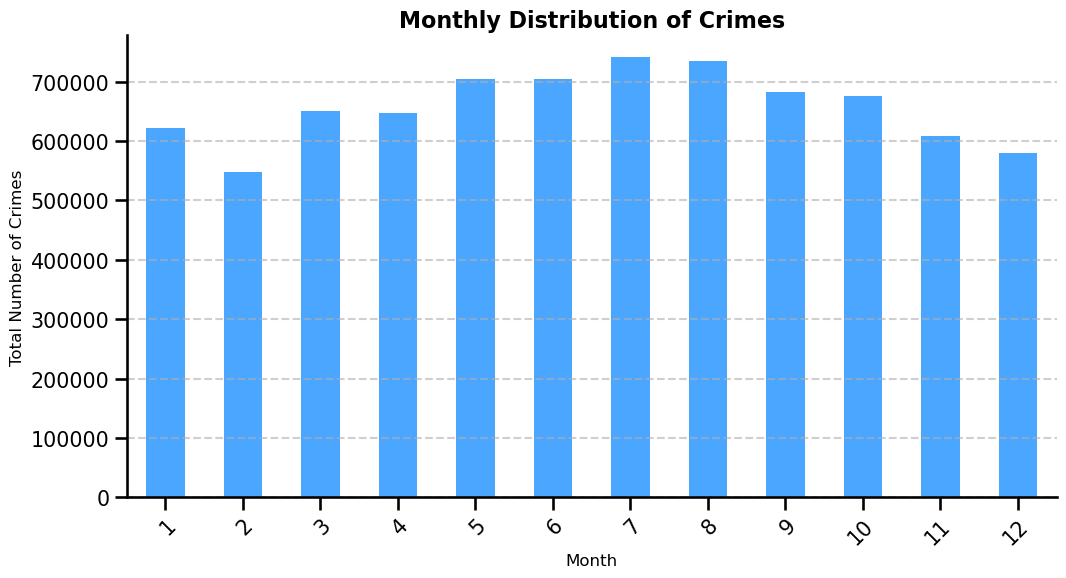

In [20]:
plt.figure(figsize=(12, 6))

# Using a more distinctive color, and adding transparency for a modern look
monthly_crime.plot(kind='bar', color='dodgerblue', alpha=0.8)

plt.title('Monthly Distribution of Crimes', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Number of Crimes', fontsize=12)

# Making the x-axis labels more readable
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Removing the top and right spines for aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [21]:
crime_by_month=df.groupby('Primary Type')['Month'].value_counts().sort_index()
plot_month = crime_by_month.to_frame('# of Crimes').reset_index()

C:\Users\cjhun\anaconda3\envs\dojo-env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


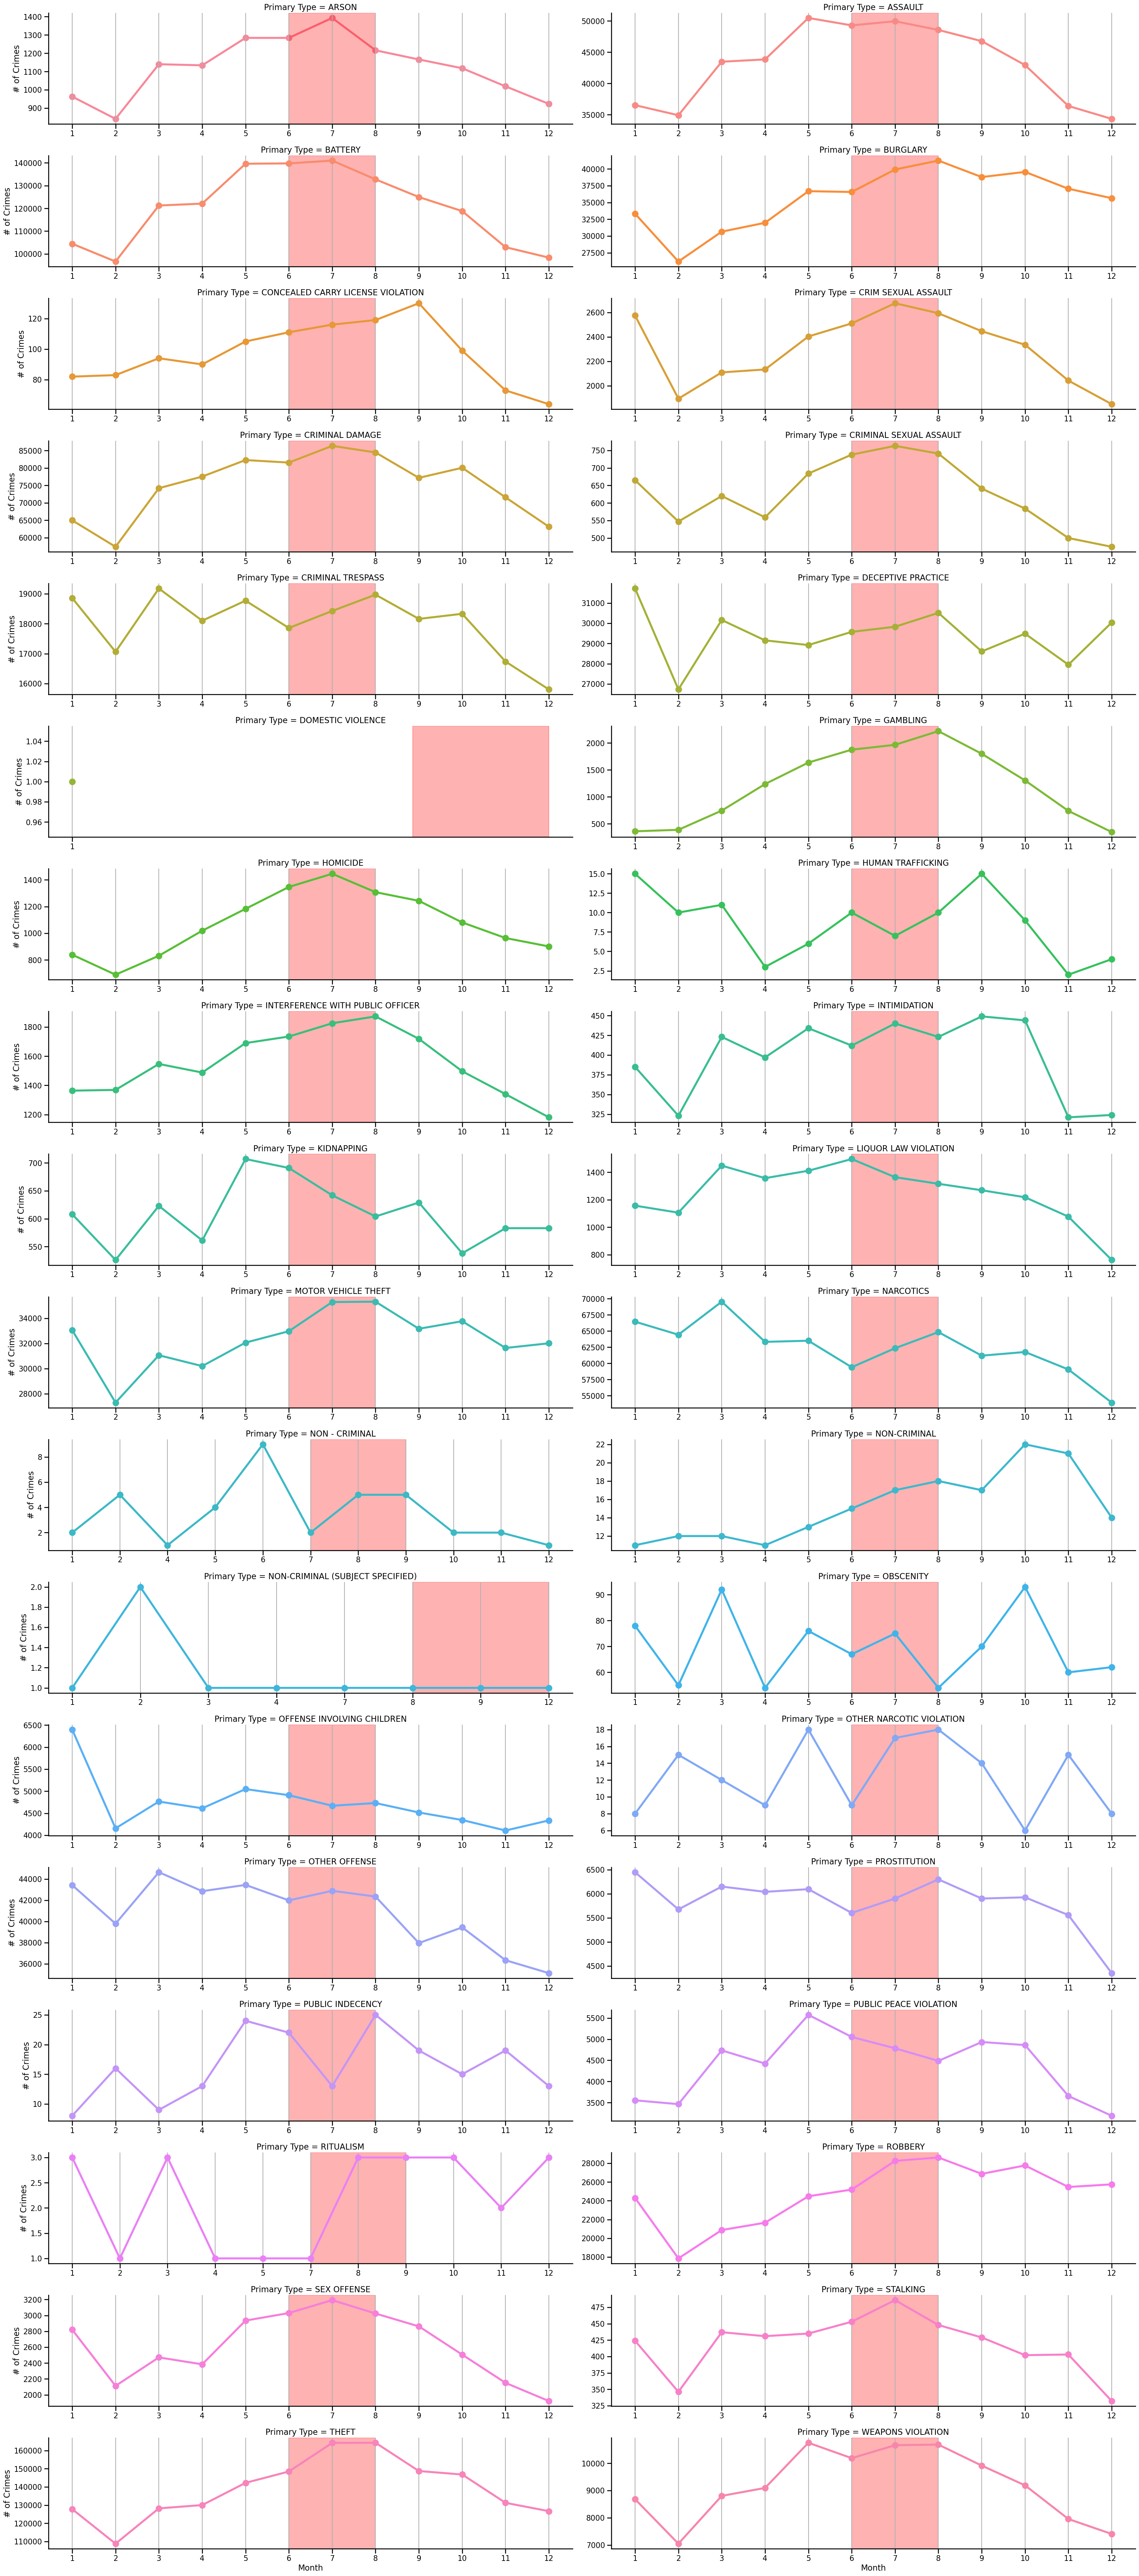

In [23]:
g = sns.catplot(data=plot_month, x='Month', y='# of Crimes',
                hue='Primary Type', col='Primary Type',col_wrap=2,
            aspect=4, height=4,
            kind='point',sharey=False,sharex=False);
for ax in g.axes:
    ax.axvspan(5, 7, color='red', alpha=0.3)
[ax.grid(axis='x') for ax in g.axes];

- July, August, and June stand out as the months with the highest crime rates.

- During this period, the majority of crimes are increasing, with a few exceptions including Public Peace Violation, Offense Involving Children, Kidnapping, Liquor Law Violation, and Human Trafficking.

## Q3) Is the total number of crimes increasing or decreasing across the years? Are there any individual crimes that are doing the opposite? (decreasing when overall crime is increasing or vice-versa?)

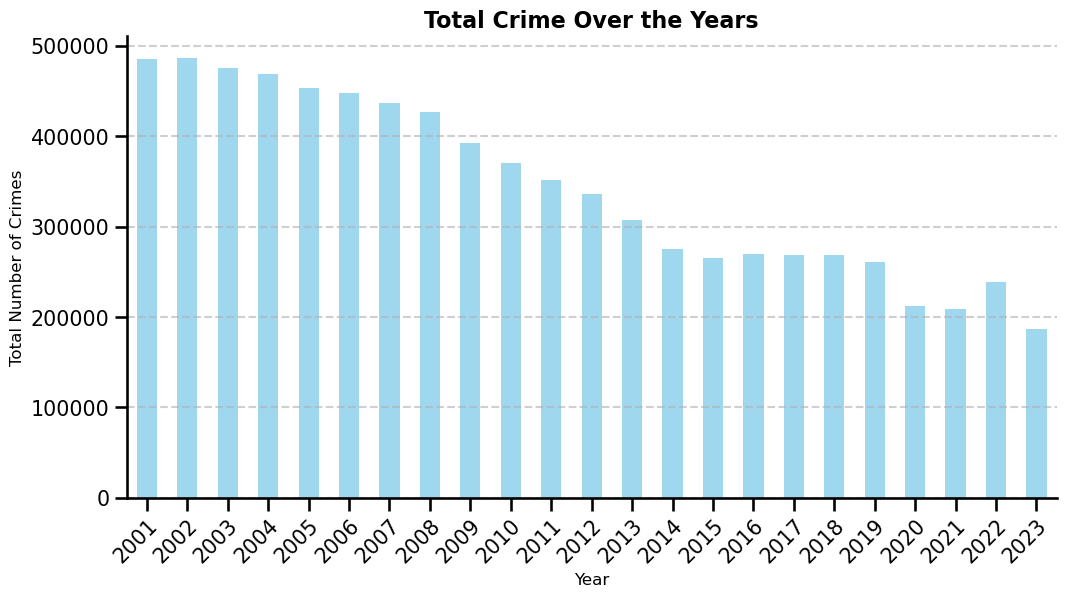

In [28]:
plt.figure(figsize=(12, 6))

# Opting for a more distinctive color and adding transparency for a modern look
yearly_crime.plot(kind='bar', color='skyblue', alpha=0.8)

plt.title('Total Crime Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Crimes', fontsize=12)

# Making the x-axis labels more readable
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

# Adding a grid for improved readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Removing the top and right spines for a cleaner appearance
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [26]:
crime_by_year=df.groupby('Primary Type')['Year'].value_counts().sort_index()
plot_df = crime_by_year.to_frame('# of Crimes').reset_index()
plot_df=plot_df.sort_values('# of Crimes')

C:\Users\cjhun\anaconda3\envs\dojo-env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


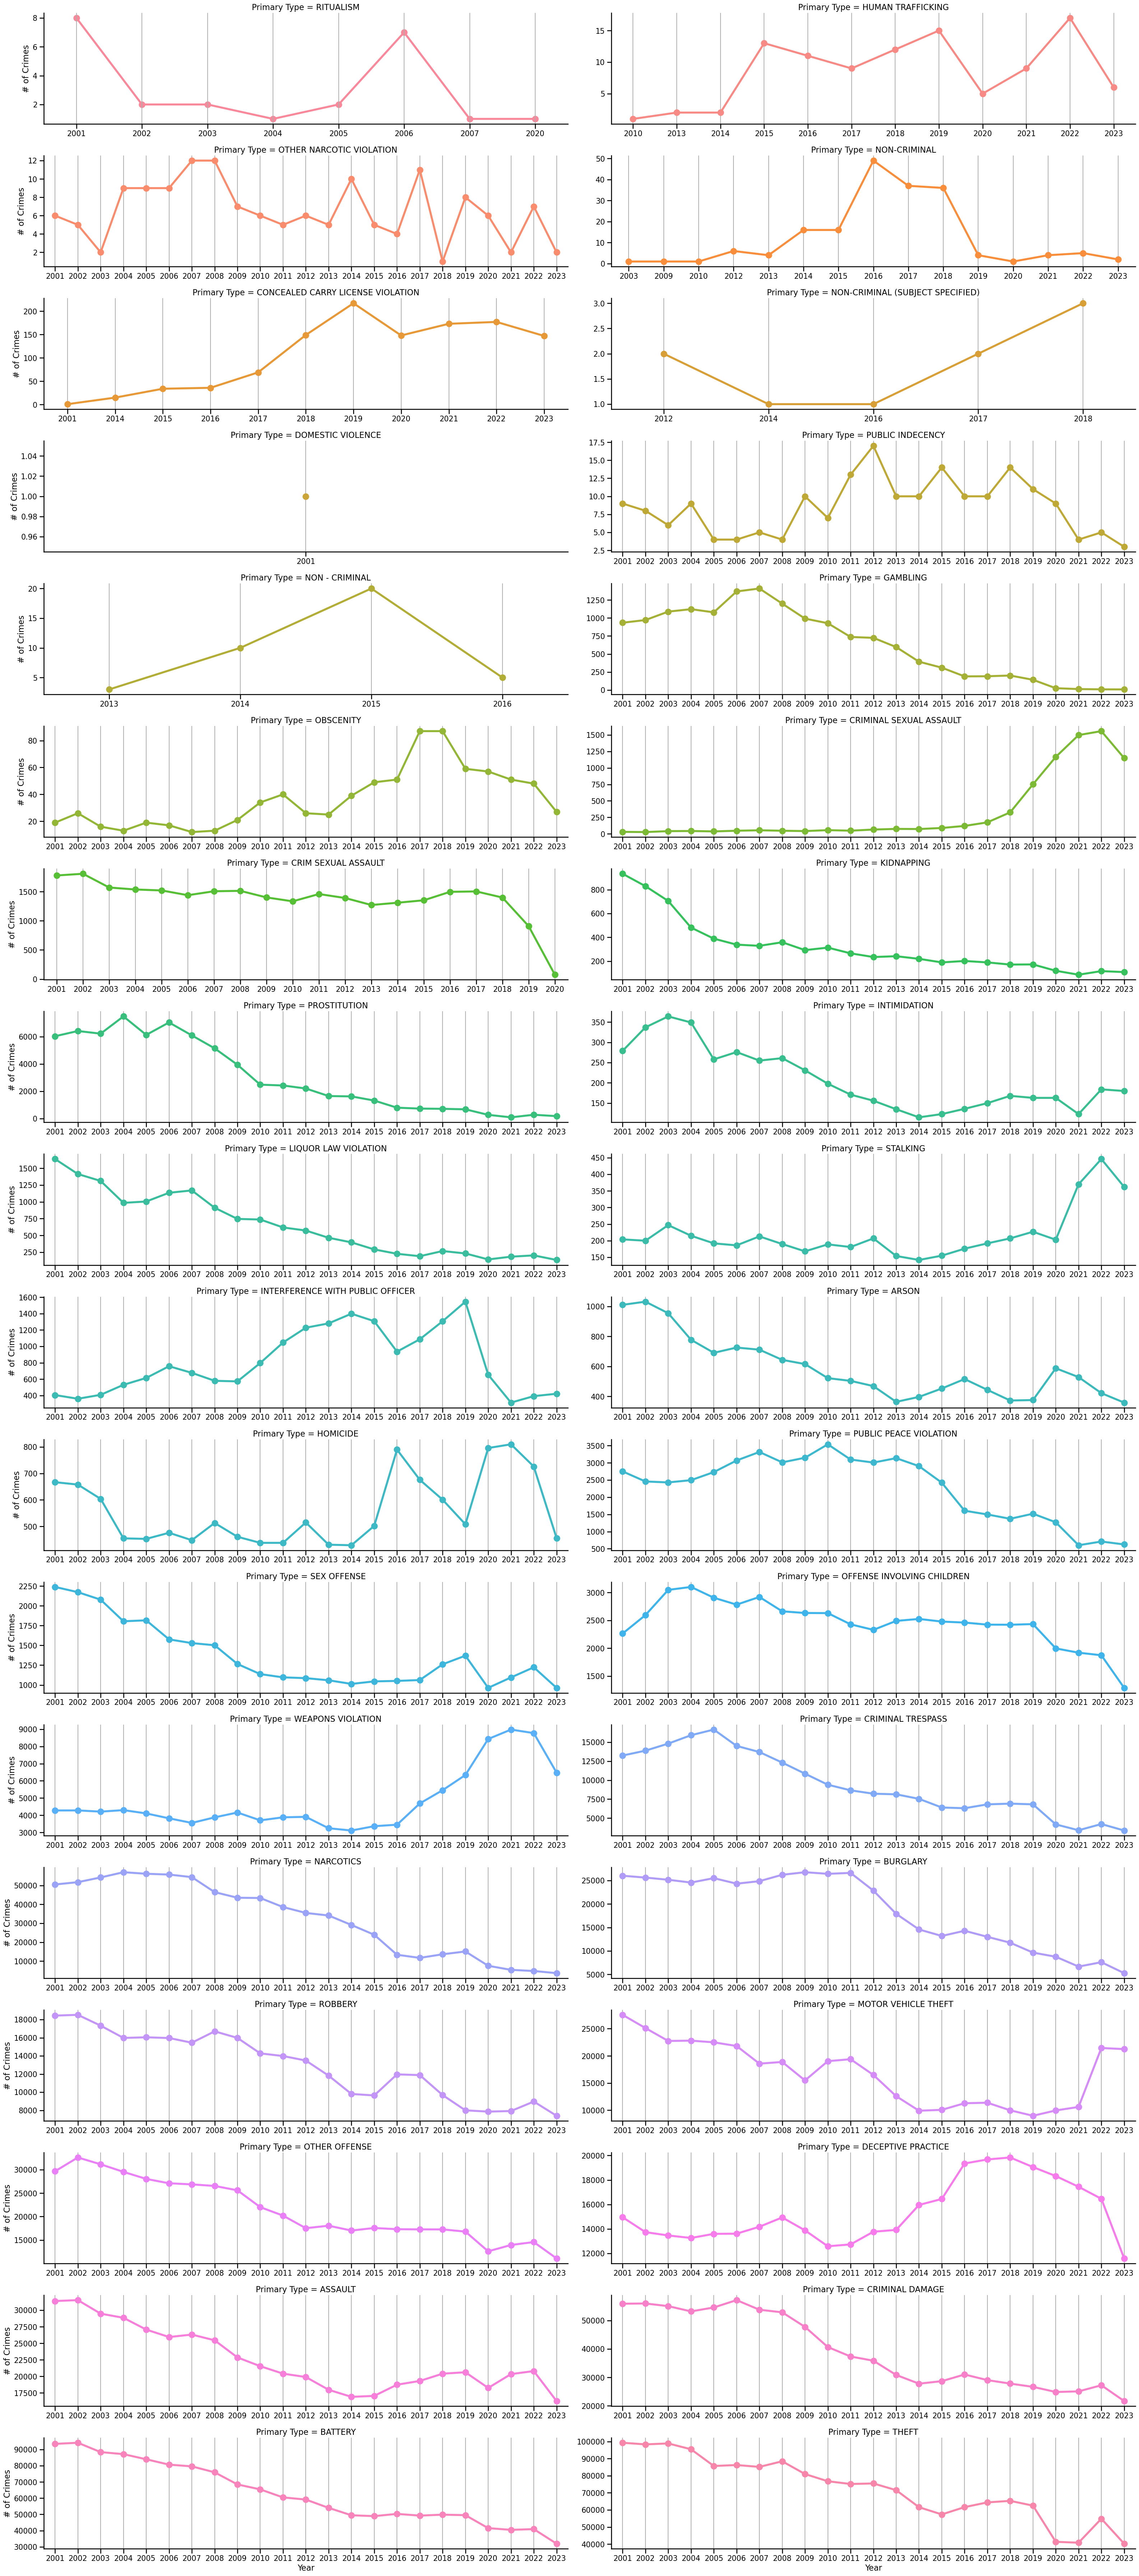

In [27]:
g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                hue='Primary Type', col='Primary Type',col_wrap=2,
            aspect=4, height=4,
            kind='point',sharey=False,sharex=False);

[ax.grid(axis='x') for ax in g.axes];

- While the plots above indicate an overall decline in crime, there is a notable increase in specific categories such as concealed carry violations, non-criminal incidents (subject specified), criminal sexual assault, stalking, and weapons violations.